<a href="https://colab.research.google.com/github/kotlanandu525/MACHINE_LEARNING/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


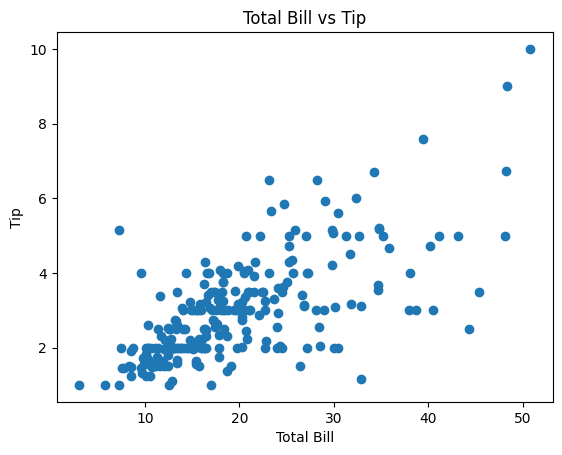

Coefficient: 0.9357171400271824
Intercept: 3.0877948717948724
MSE: 0.5688142529229537
R2 Score: 0.5449381659234664


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


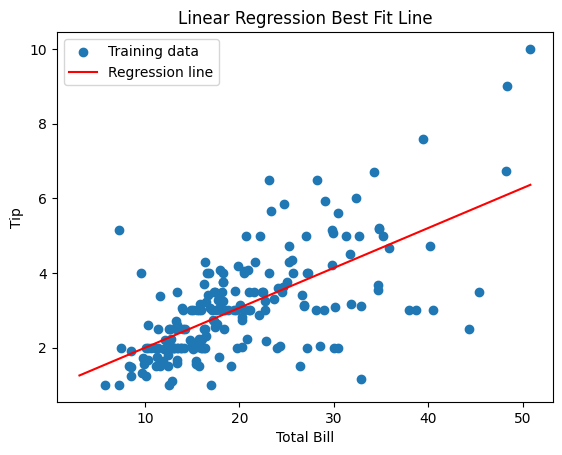

Enter bill amt4000
predicted tip value is [428.78006297]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
df = sns.load_dataset("tips")
print(df.head())
print(df.info())
print(df.describe())

# Visualize relationship
plt.scatter(df["total_bill"], df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

# Feature & target separation
X = df[["total_bill"]]  # 2D
y = df["tip"]           # 1D

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature standardization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Prediction
y_pred = model.predict(x_test_scaled)

# Model evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualize regression line (on original scale for clarity)
# Create smooth range of total_bill
x_line = np.linspace(X["total_bill"].min(), X["total_bill"].max(), 100).reshape(-1, 1)

# Scale and predict
x_line_scaled = scaler.transform(x_line)
y_line = model.predict(x_line_scaled)

# Plot
plt.scatter(x_train["total_bill"], y_train, label="Training data")
plt.plot(x_line, y_line, color="red", label="Regression line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit Line")
plt.legend()
plt.show()


#input output reaal time
bill_amt=float(input("Enter bill amt"))
bill_scaled=scaler.transform([[bill_amt]])
tip_pred=model.predict(bill_scaled)
print(f"predicted tip value is {tip_pred}")